
 <img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" alt="Panda Logo" width="500">

`Pandas` is a `Python` module for data manipulation and analysis widely used all around the world both in universities and companies. We will show how easy is to work with data in notebooks using a few lines of `Pandas` code.

https://pandas.pydata.org/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data files formats

## CSV format

The Comma-Separated Values (CSV) format uses a text file to store the tabular data. Each line of the file is a record. Each record consists of one or more fields, initially separated by commas as the name of this file format indicates.

But other separators can be used, the semicolon, the space and the tab are the most frequently used besides the comma. Usually, the separator is not part of the data, this practice avoids errors and simplifies the processing.

The format dates back to the early days of computing and is widely used to pass data between machines with different architectures. The plain-text character of CSV files largely avoids incompatibilities such as byte-order and word size.

Here you can see an example:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
```



## JSON format

JSON is the acronym for JavaScript Object Notation.
Similarly to CSV format, JSON is a format that uses a human-readable text file with extension `.json`. It is an open standard to store and transmit data.

JSON was first designed in 2001 for communication purposes between
world wide web servers and browsers. The JSON format became and [ECMS standard](https://www.ecma-international.org/publications-and-standards/standards/ecma-404/) in 2013.


The JSON format defines a small set of structuring rules for the portable representation of structured data.

Records are defined with key-value pairs, for instance:
`{"name": "Anne", "age": 28, "PhD" : true}`

And lists of records are defined with square brackes and separated by commas, for instance:
```
[
  {"name": "Anne", "age": 28, "PhD" : true},
  {"name": "Bob", "age": 25, "PhD" : false},
  {"name": "Claire", "age": 31, "PhD" : false},
]
```


# Access to the files

To work with data files (`.csv`, `.json`) we need first to find these files. Then we will see how `pandas` can digest the data in the file to build a dataframe.

Let's look for some examples of data files

## Files in `sample_data`


As you can check with the folder tab on the left, there is always a `sample_data` folder for you to have data to work with.

And among the files there are a few of them with the `.csv` extension.

For `pandas` to use the file, we need to know the path for it in the file system. Fortunately with `Colab` is easy, just use the dots on the right of the filename and copy the path for the file you are interested in.

Then, in a cell code we load the `pandas` module with the usual shorhand.


In [ ]:
import pandas as pd

Then to open the file we use the path we copied.

In [ ]:
!head '/content/sample_data/california_housing_test.csv'

In [ ]:
dfh = pd.read_csv('/content/sample_data/california_housing_test.csv')
dfh

In [ ]:
dfh.info()

In [ ]:
dfh.describe()

In the `sample_data` folder on the left, we can also find a `.json` file.

By clicking the file we can see its content. Note the `.json` structure: the records and the list of records.

Probably you are already familiar with these data, if not I invite you to follow the link https://en.wikipedia.org/wiki/Anscombe%27s_quartet

We need the path to load the file. Remember the path can be recoverd in the `Colab` interface, use the dots on the right of the file name.

In [ ]:
df = pd.read_json('/content/sample_data/anscombe.json')
df

And now we could work with our dataframe, for instance:

In [ ]:
df.info()

Let's select a couple of sets:

In [ ]:
dfI = df[df['Series']=='I']
dfII = df[df['Series']=='II']

We check some basic properties:

In [ ]:
dfI.describe()

In [ ]:
dfII.describe()

## Personal files in `Drive`

But we can also make use of the files we already have in `Google Drive`.
For that, we have to **mount** the `Drive`.

There are different ways to do it, maybe the simplest one is to go to the folder tab on the left and click on the icon  
image.png


You will have to confirm that you want the notebook to get access to your `Drive`. Remember that the notebook is yours.


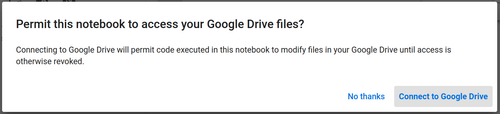


Finally, in the folder tab on the left you can see the `drive` folder, and you can use the path to load the data into dataframes.

In [ ]:
dfw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/seattle_weather.csv')
dfw

In [ ]:
dfw.info()

## Online Files

In many occassions, data are accesible online. To use these kind of data files is quite convenient if you share the notebook with other people.

Consider this pandas code

In [ ]:
dfi = pd.read_csv('https://raw.github.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv')
dfi

In this examples above everything went well. But in some other occasions things can go wrong.


# Frequent problems


* **Formats**. There are different alternatives or modes for the formats that can produce some error.

* **Types**. When reading from files, some information on the data structura can be missing.

* **Coding system**. As you know, files can be encoded using different systems. Python uses a modern and quite standard [`utf-8`](https://en.wikipedia.org/wiki/UTF-8) encoding.

* **Web access**. Some web servers expect the web page requests to come from a browser.




## 1. Format of the data in the file

Study the result of the dataframe generated by the url below.

In [ ]:
file_url="https://drive.google.com/uc?id=1-CElwGx6-VyjIZ12U6HM3ddniZOAs7ua&export=download"

In [ ]:
df_reg = pd.read_csv(file_url)
df_reg

Something is not working...

In [ ]:
df_reg.info()

The solution is quite simple

In [ ]:
df_reg = pd.read_csv(file_url, sep=';')
df_reg

In [ ]:
df_reg.info()

## Missing information on types

Consider the dataframe we have defined previously

In [ ]:
dfw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/seattle_weather.csv')
dfw

And maybe you remember this dataset is also available in `vega_datasets`

In [ ]:
from vega_datasets import data
dfw2 = data.seattle_weather()
dfw2

They are quite similar but


In [ ]:
condition = "(date>='2012-12-1') & (date<='2012-12-2')"

In [ ]:
dfw2.query(condition)

In [ ]:
dfw.query(condition)

Let's look at the info

In [ ]:
dfw.info()

In [ ]:
dfw2.info()

In [ ]:
dfw3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/seattle_weather.csv',
                   parse_dates=['date'])
dfw3.info()

## Encoding of the data

In the following link you can find the open data site for the Madrid municipality, https://datos.madrid.es/sites/v/index.jsp?vgnextoid=6c0b6d01df986410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD


We can use a direct link to access the data https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv.

So we can try to download the data directly:

In [ ]:
pd.read_csv('https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv')

But... It does not work! Don't worry, we will look for solutions and, by the way, learn a bit about data and encoding.

So let's see again the error we got.

In [ ]:
pd.read_csv('https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv')

We see it's a coding error: There is a position in the file that cannot be decoded with `utf-8`.



This kind of errors can be solved guessing the encoding of the file we want to access.

It is frequent to find files coded with the older encodings like [iso-8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) or [Windows-1252](https://en.wikipedia.org/wiki/Windows-1252).

Let's try to access the file with a different encoding.


In [ ]:
pd.read_csv('https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv',
             encoding='iso-8859-1')

Not yet!! But the error is different.

We can now suspect of the separator, but anyway, if we have the link to the data, we can always have a look at them, you could always follow the link, download the file and peep into the data.

Once we understand, or just guess, that the separators are different from commas we know how to solve the problem. We can add the separator in the `pandas` request.

In [ ]:
pd.read_csv('https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv',
                  encoding='iso-8859-1',
                  sep=';')


Now everything is working and we can put the online data into a dataframe with one click.

In [ ]:
dfe = pd.read_csv('https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.csv',
                  encoding='iso-8859-1',
                  sep=';')
dfe.info()

# Exercise

Get the data from the file accesible online in the following url

https://wild.ucm.es/data/pollution.csv

Use pandas commands to build a pandas dataframe. The resulting dataframe should have the following view:

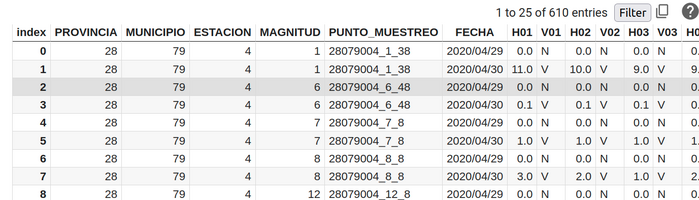

Check that the types for the columns are right.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/pollution.csv',
                  #encoding='iso-8859-1',
                  sep=';', parse_dates=['FECHA'])
df2
#df2.info()

# **Exercise**

Build a dataframe from the `.json` data in `trips.json` file in the folder `/content/drive/MyDrive/Colab Notebooks/data`


In [ ]:
df3 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/data/trips.json')
                  #encoding='iso-8859-1',
                  #sep=';', parse_dates=['FECHA']

df3
#df3.info()

<hr>
<hr>
Carlos Gregorio Rodríguez

Universidad Complutense de Madrid

<img src="https://static0.makeuseofimages.com/wordpress/wp-content/uploads/2019/11/CC-BY-NC-License.png" alt="cc by nc" width="200"/>

https://creativecommons.org/licenses/by-nc/4.0/